# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

The assignment is in the last cell.

## This cell automatically downloads Capital Bikeshare data

### And here we read in the data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np
bikes = pd.read_csv('../data/bikeshare.csv.gz')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)
bikes["dur"] = (bikes['Duration (ms)']/1000).astype(int)
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,dur
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,301
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,557
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,555
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,766
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,139


In [2]:
bikes.dur.mean()

992.8716543657755

In [3]:
bikes.dur.std()

2073.9809135296514

In [4]:
bikes[bikes.dur>16000].shape

(973, 12)

In [5]:
plt.rcParams['figure.figsize'] = 20, 10

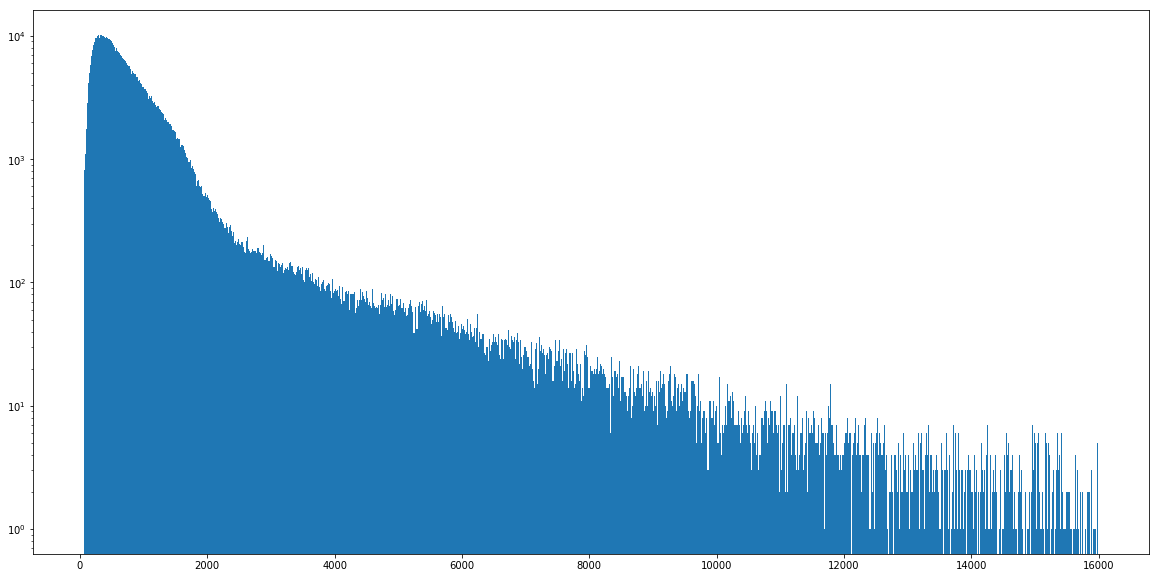

In [6]:
_=plt.hist(bikes[bikes.dur<16000].dur, log=True, bins=1000)

In [7]:
short = bikes[bikes.dur<16000]

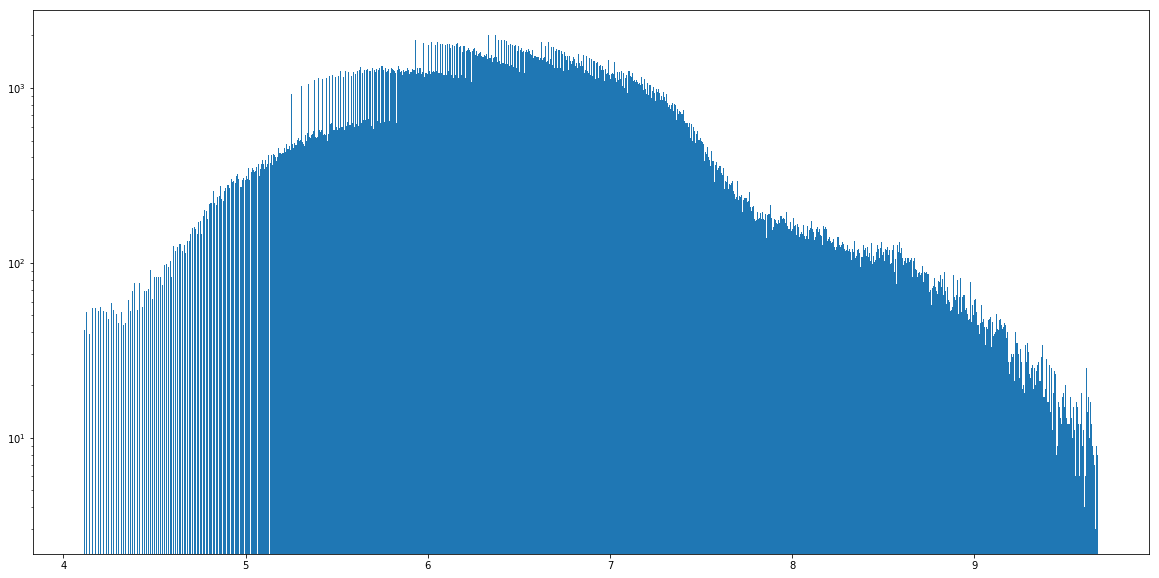

In [8]:
_=plt.hist(np.log1p(short.dur), log=True, bins=1000)

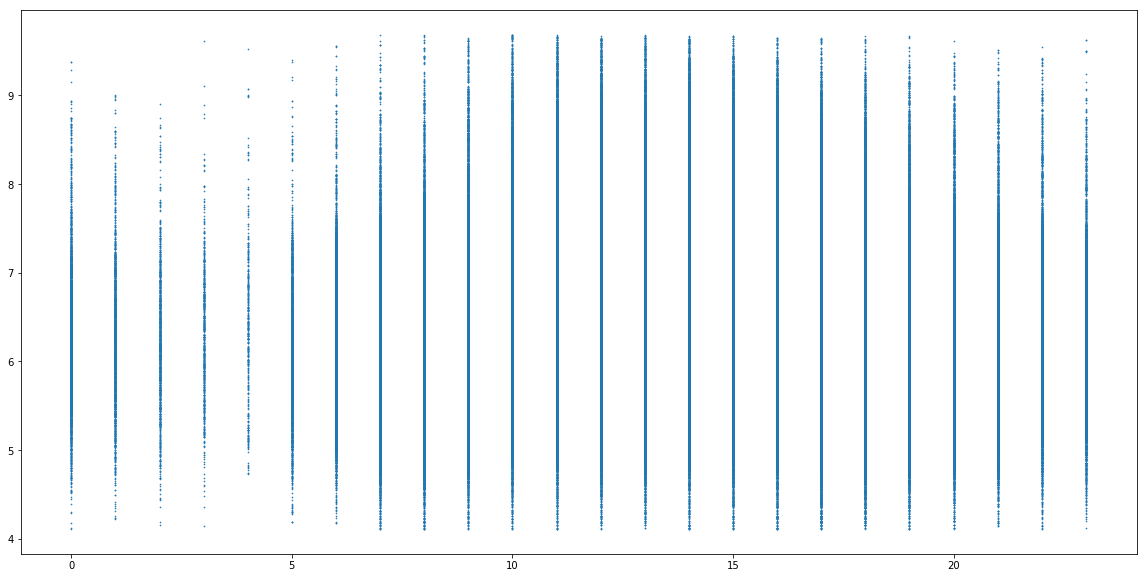

In [9]:
plt.scatter(short.start.dt.hour, np.log1p(short.dur), s=.4)

In [10]:
np.log1p(0), np.log(0)

/Users/Broth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


(0.0, -inf)

In [11]:
bikes['log_dur'] = np.round(np.log1p(bikes.dur), 1)

In [12]:
monday = bikes[bikes.start.dt.dayofweek==1]

In [13]:
bikes.start.dt.dayofweek.unique()

array([3, 2, 1, 0, 6, 5, 4])

In [14]:
dur_hour = monday.groupby(['log_dur', monday.start.dt.hour]).count()

In [15]:
dur_hour

Duration (ms)  Start date  End date  Start station number  \
log_dur start                                                              
4.1     7                  1           1         1                     1   
        9                  2           2         2                     2   
        11                 1           1         1                     1   
        14                 2           2         2                     2   
        16                 2           2         2                     2   
        17                 3           3         3                     3   
        19                 3           3         3                     3   
        21                 1           1         1                     1   
        22                 1           1         1                     1   
4.2     7                  5           5         5                     5   
        8                  3           3         3                     3   
        9                  3           3         3                     3   
        13                 2           2         2                     2   
        15                 3           3         3                     3   
        16                 6           6         6                     6   
        17                 7           7         7                     7   
        18                 4           4         4                     4   
        20                 7           7         7                     7   
        21                 2           2         2                     2   
4.3     1                  1           1         1                     1   
        5                  1           1         1                     1   
        7                  4           4         4                     4   
        8                  2           2         2                     2   
        9                  2           2         2                     2   
        10                 1           1         1                     1   
        11                 2           2         2                     2   
        12                 4           4         4                     4   
        13                 6           6         6                     6   
        14                 1           1         1                     1   
        16                 1           1         1                     1   
...                      ...         ...       ...                   ...   
10.7    19                 2           2         2                     2   
        20                 1           1         1                     1   
        22                 1           1         1                     1   
        23                 1           1         1                     1   
10.8    3                  1           1         1                     1   
        6                  1           1         1                     1   
        17                 3           3         3                     3   
        18                 4           4         4                     4   
        19                 3           3         3                     3   
        20                 1           1         1                     1   
        21                 1           1         1                     1   
        23                 1           1         1                     1   
10.9    16                 2           2         2                     2   
        17                 1           1         1                     1   
        18                 1           1         1                     1   
        20                 1           1         1                     1   
11.0    17                 1           1         1                     1   
        19                 1           1         1                     1   
        20                 1           1         1                     1   
11.1    14                 1           1         1             

In [16]:
duration_hour = dur_hour.start.unstack().T.fillna(0)
duration_hour

log_dur,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,...,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4
start,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,2.0,1.0,2.0,4.0,9.0,11.0,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,5.0,4.0,1.0,5.0,12.0,25.0,31.0,46.0,46.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,2.0,6.0,7.0,11.0,22.0,52.0,68.0,79.0,...,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


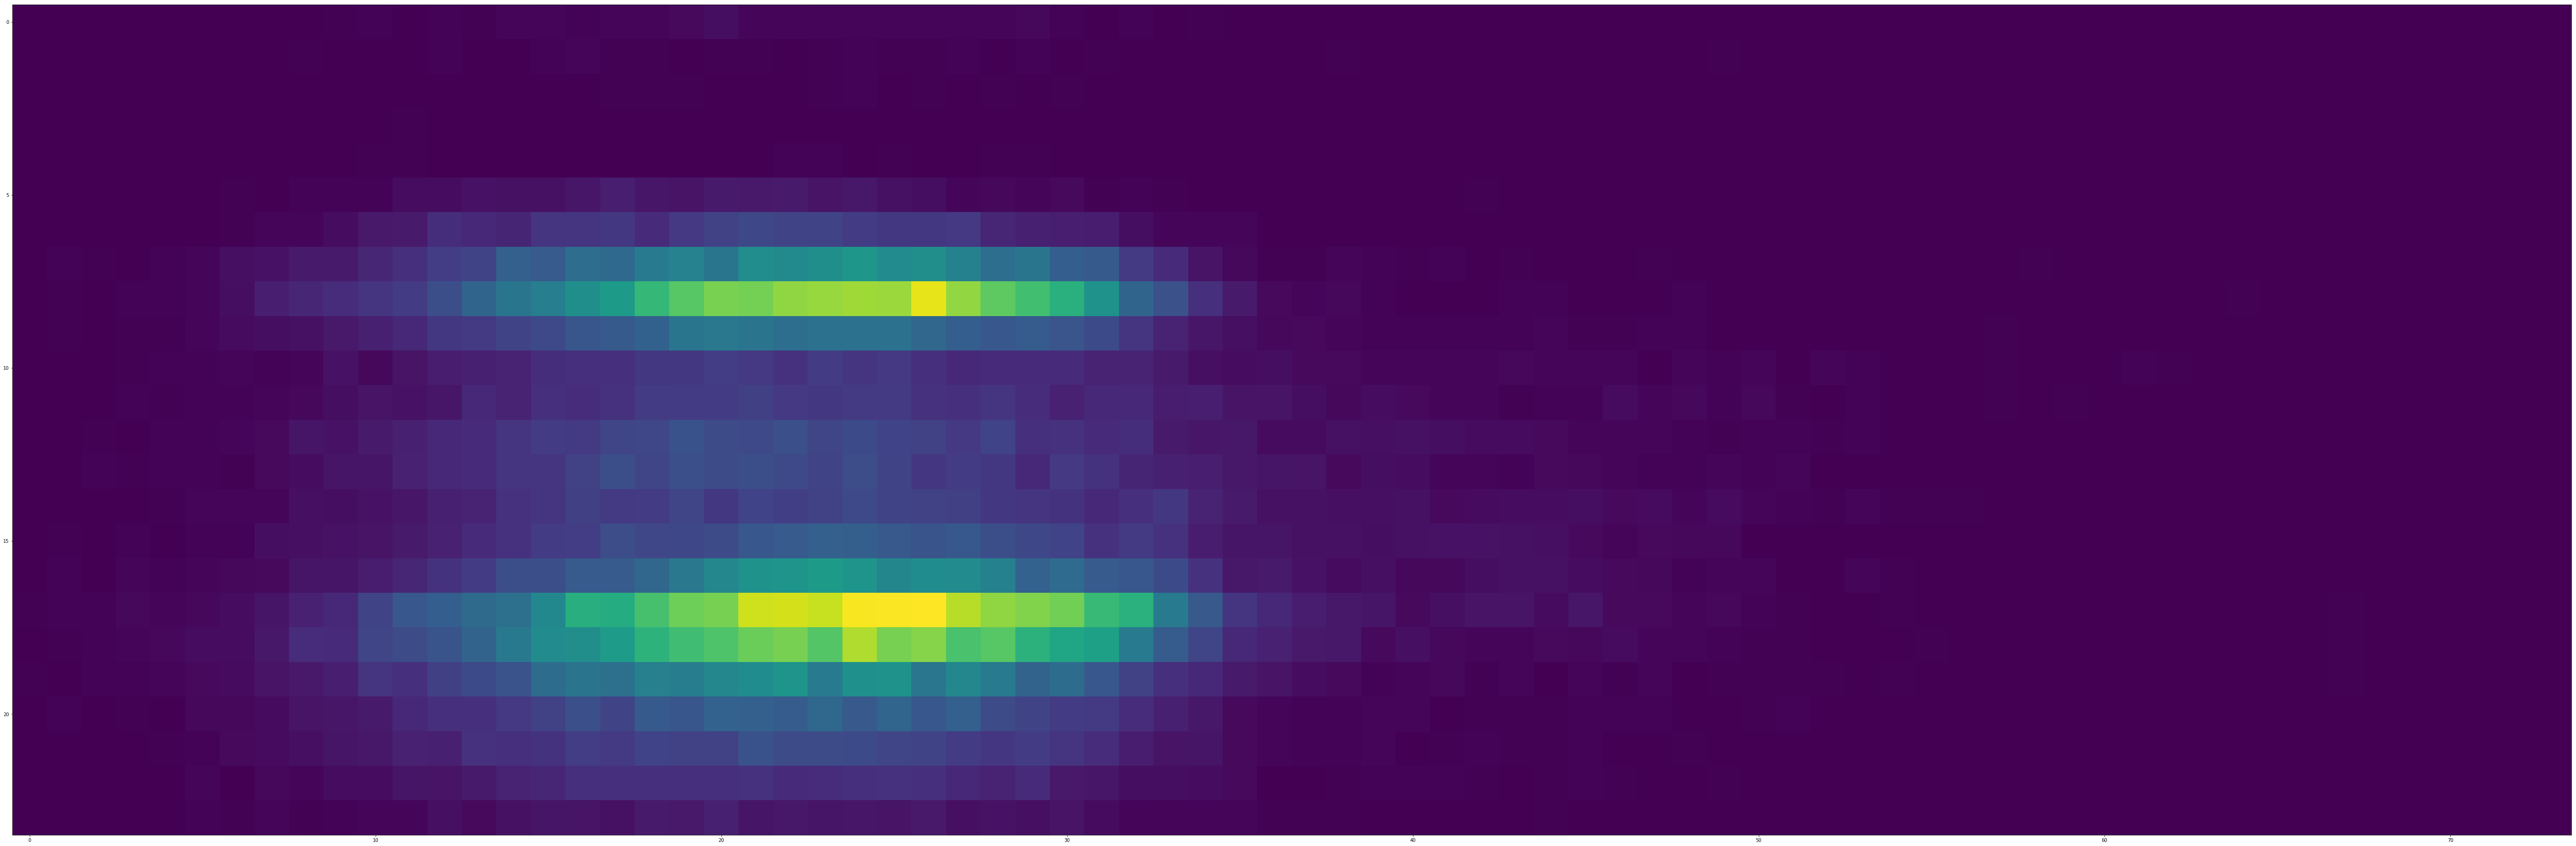

In [17]:
plt.figure(figsize=(100,100))
plt.imshow(duration_hour)

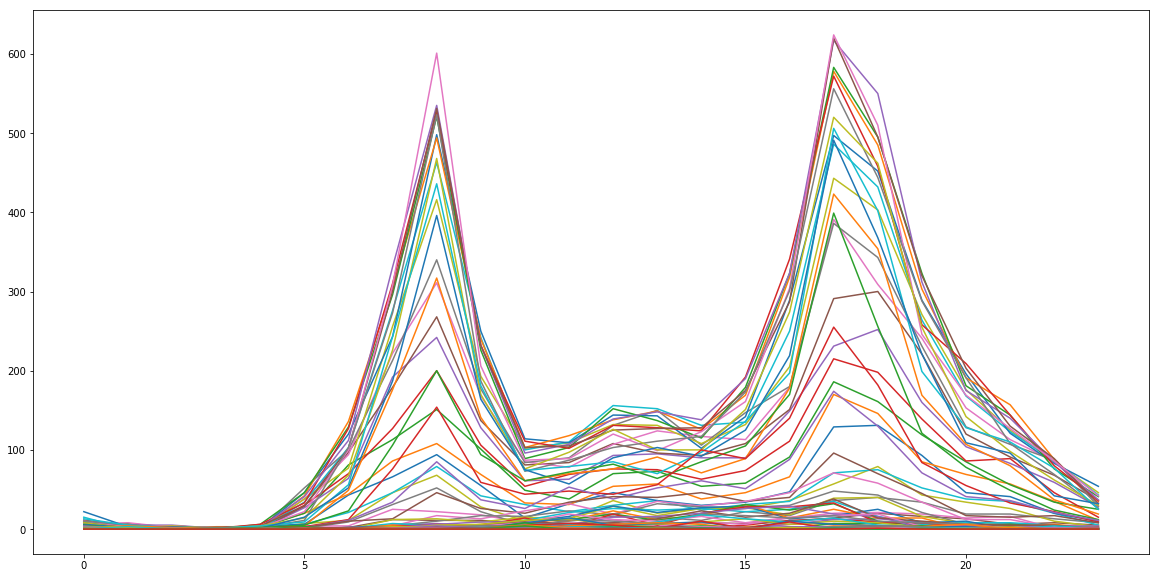

In [18]:
_=plt.plot(duration_hour)

In [19]:
bikes['Member Type'].value_counts()

Registered    467432
Casual         84967
Name: Member Type, dtype: int64

### Create a new column that represents the hour+minute of the day as a fraction (i.e. 1:30pm = 13.5)

In [20]:
np.round(.65, 1)

0.6

In [21]:
37//6, (37//6)/10, 37/60

(6, 0.6, 0.6166666666666667)

In [22]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute//6)/10)

In [23]:
bikes['roundhour_of_day'] = (bikes.start.dt.hour ) # keep the hour handy as well

### Aggregate to get a count per hour/minute of the day across all trips

NameError: name 'y' is not defined

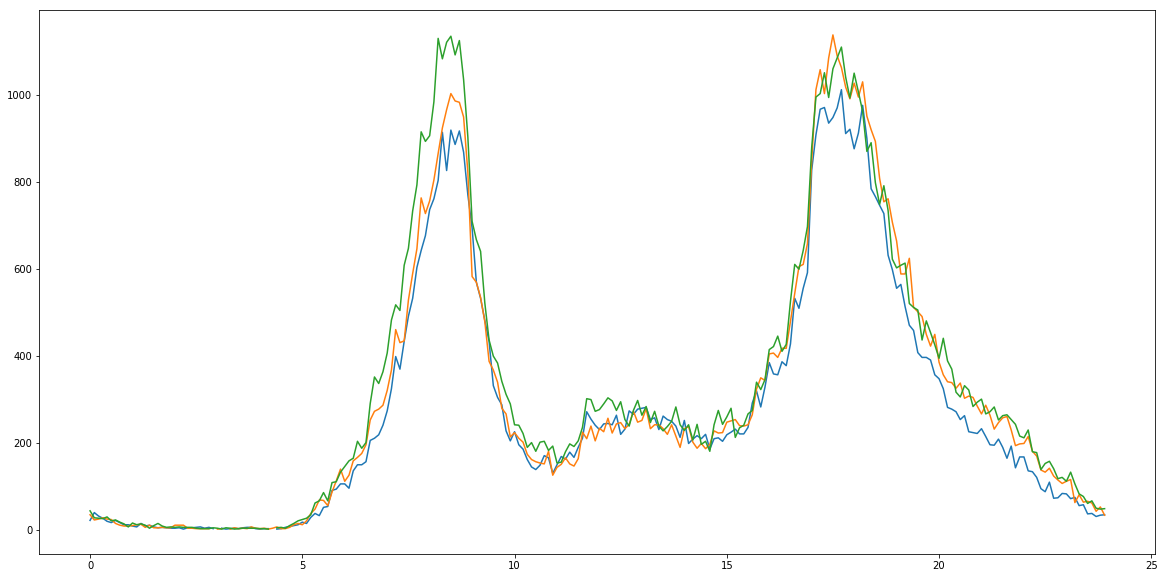

In [24]:
reg_bikes = bikes[bikes['Member Type']=='Registered']
hours = reg_bikes.groupby([reg_bikes.hour_of_day, reg_bikes.start.dt.dayofweek]).agg('count')
hours['hour'] = hours.index
day_hour_count = hours.dur.unstack()
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count[0])
plt.plot(day_hour_count.index, day_hour_count[1])
plt.plot(day_hour_count.index, day_hour_count[2])
plt.plot(y.index, day_hour_count[3])
plt.plot(y.index, day_hour_count[4])
plt.plot(y.index, day_hour_count[5])
plt.plot(y.index, day_hour_count[6])

In [25]:
day_hour_count

start,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
0.5,16.0,23.0,20.0,25.0,52.0,70.0,58.0
0.6,21.0,14.0,22.0,25.0,42.0,58.0,83.0
0.7,16.0,10.0,17.0,17.0,32.0,64.0,61.0
0.8,11.0,8.0,13.0,17.0,27.0,71.0,61.0


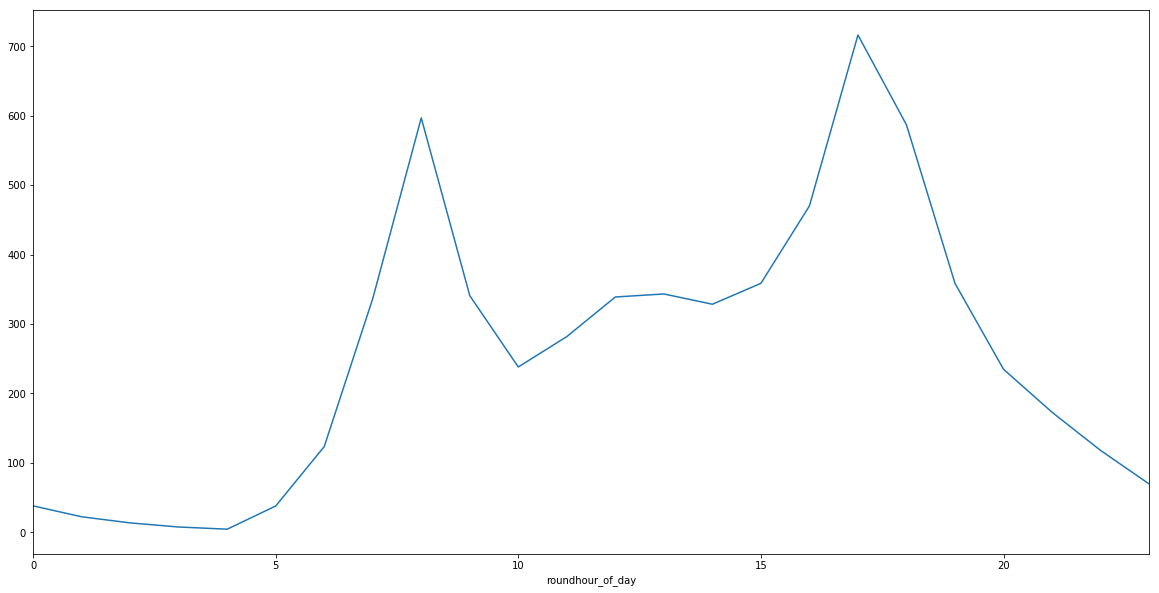

In [26]:
hoursn = bikes.groupby('roundhour_of_day').agg('count')
hoursn['hour'] = hoursn.index
(hoursn.start/90).plot() # 90 days in a quarter

In [27]:
hour_count = bikes.groupby(bikes.start.dt.dayofyear*24 + bikes.start.dt.hour).count()

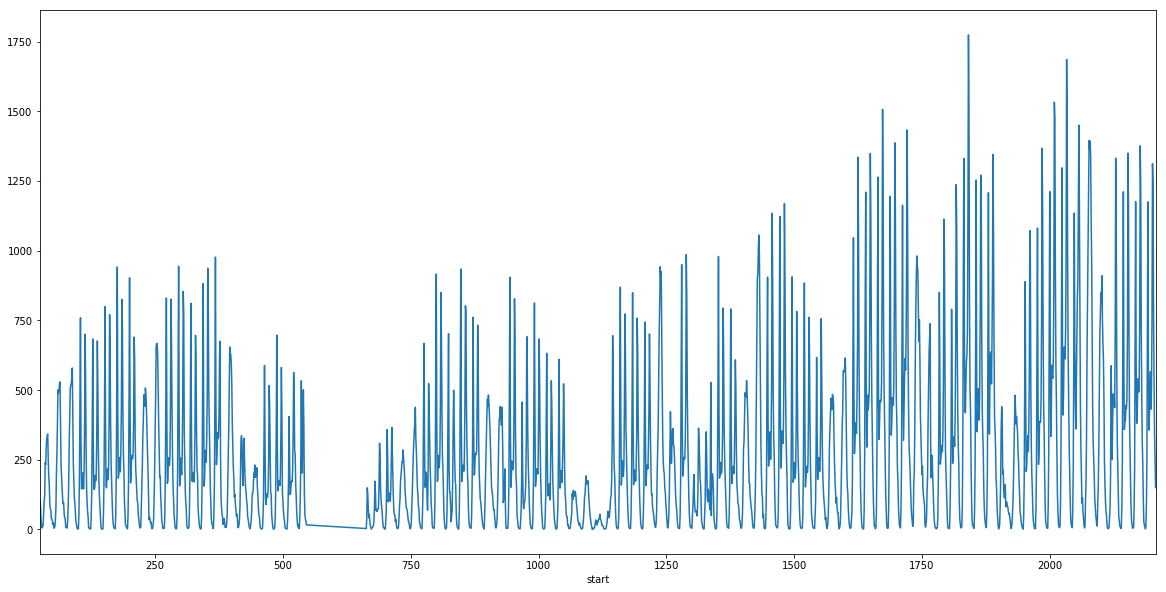

In [28]:
plt.figure(figsize=(20,10))
hour_count.start.plot()

In [29]:
day_count = bikes.groupby(bikes.start.dt.dayofyear).count()

In [30]:
day_hour = bikes.groupby([bikes.start.dt.dayofyear, bikes.start.dt.hour]).count()

In [31]:
day_hour.start.unstack()

start,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start,,,,,,,,,,,,,,,,,,,,,
1,56.0,105.0,74.0,32.0,13.0,5.0,10.0,14.0,54.0,101.0,...,324.0,338.0,342.0,247.0,185.0,160.0,90.0,75.0,70.0,39.0
2,37.0,31.0,17.0,23.0,4.0,7.0,10.0,34.0,80.0,203.0,...,495.0,525.0,529.0,392.0,232.0,188.0,150.0,114.0,91.0,96.0
3,59.0,42.0,39.0,15.0,6.0,9.0,5.0,33.0,87.0,168.0,...,524.0,546.0,579.0,398.0,237.0,172.0,115.0,96.0,64.0,28.0
4,20.0,6.0,2.0,1.0,3.0,58.0,192.0,468.0,759.0,321.0,...,145.0,206.0,365.0,700.0,547.0,293.0,146.0,96.0,62.0,44.0
5,5.0,5.0,3.0,1.0,2.0,42.0,131.0,363.0,683.0,329.0,...,175.0,208.0,365.0,676.0,519.0,279.0,178.0,122.0,86.0,45.0
6,10.0,1.0,2.0,NaN,1.0,57.0,174.0,419.0,799.0,391.0,...,178.0,221.0,392.0,770.0,645.0,375.0,235.0,167.0,100.0,48.0
7,21.0,9.0,4.0,NaN,2.0,51.0,185.0,511.0,941.0,428.0,...,206.0,283.0,429.0,825.0,732.0,431.0,267.0,211.0,100.0,64.0
8,17.0,14.0,6.0,5.0,2.0,47.0,169.0,473.0,903.0,443.0,...,253.0,273.0,399.0,690.0,607.0,332.0,220.0,178.0,137.0,102.0
9,96.0,54.0,37.0,20.0,8.0,5.0,10.0,83.0,141.0,228.0,...,442.0,507.0,485.0,437.0,352.0,282.0,220.0,138.0,35.0,44.0


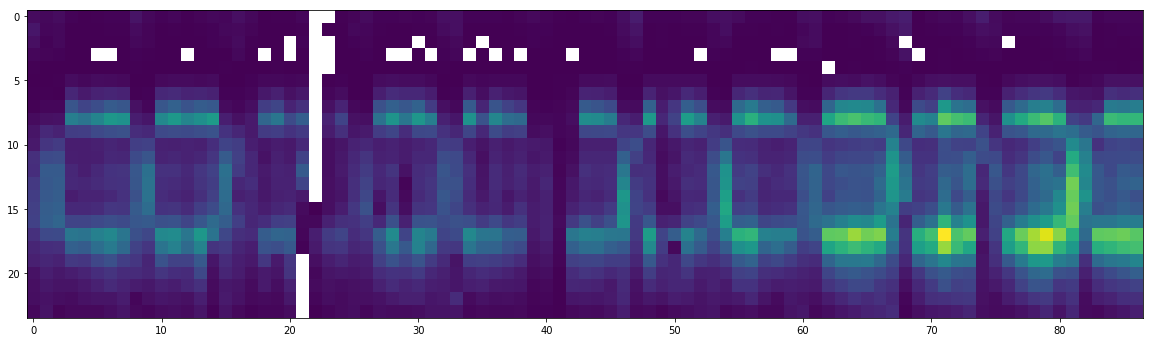

In [32]:
plt.figure(figsize=(20,10))
plt.imshow(day_hour.start.unstack().T)

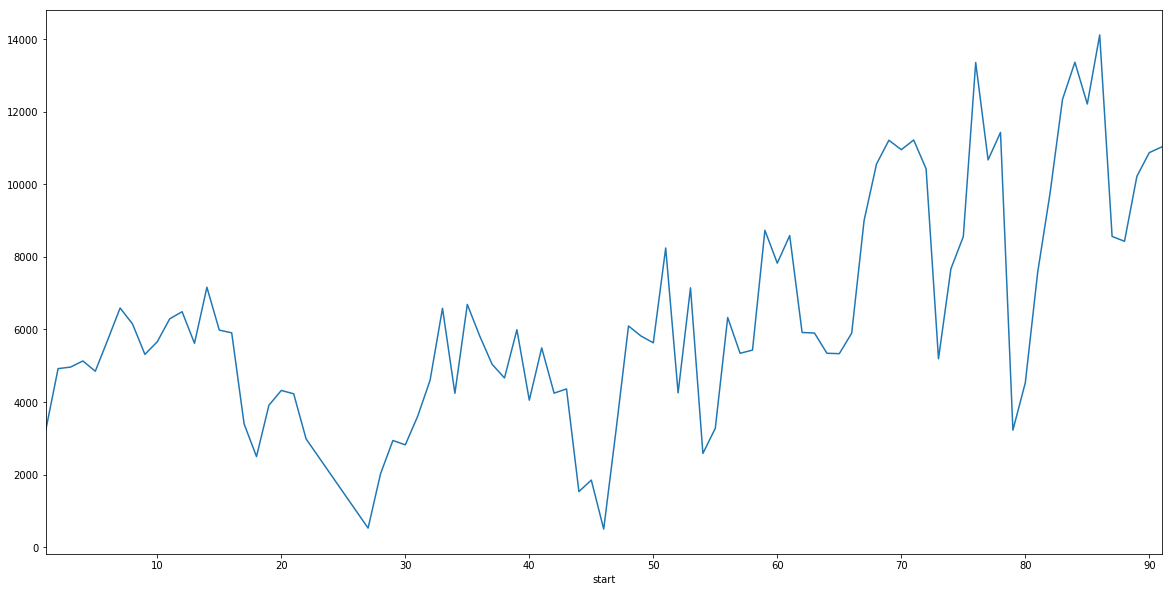

In [33]:
day_count.start.plot()

In [34]:
bikes.start.dt.dayofyear

0         91
1         91
2         91
3         91
4         91
5         91
6         91
7         91
8         91
9         91
10        91
11        91
12        91
13        91
14        91
15        91
16        91
17        91
18        91
19        91
20        91
21        91
22        91
23        91
24        91
25        91
26        91
27        91
28        91
29        91
          ..
552369     1
552370     1
552371     1
552372     1
552373     1
552374     1
552375     1
552376     1
552377     1
552378     1
552379     1
552380     1
552381     1
552382     1
552383     1
552384     1
552385     1
552386     1
552387     1
552388     1
552389     1
552390     1
552391     1
552392     1
552393     1
552394     1
552395     1
552396     1
552397     1
552398     1
Name: start, Length: 552399, dtype: int64

In [35]:
bikes[bikes.start=="2016-01-10"].shape

(1, 15)

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

## 1. Using the **`day_hour_count`** dataframe create two dataframe `monday` and `saturday` that represent the data for those days. (hint: Monday is day=0)

In [36]:
monday = day_hour_count[0]
saturday = day_hour_count[5]


## 2a. Create 3 models fit to `monday` with varying polynomial degrees. Repeat for 

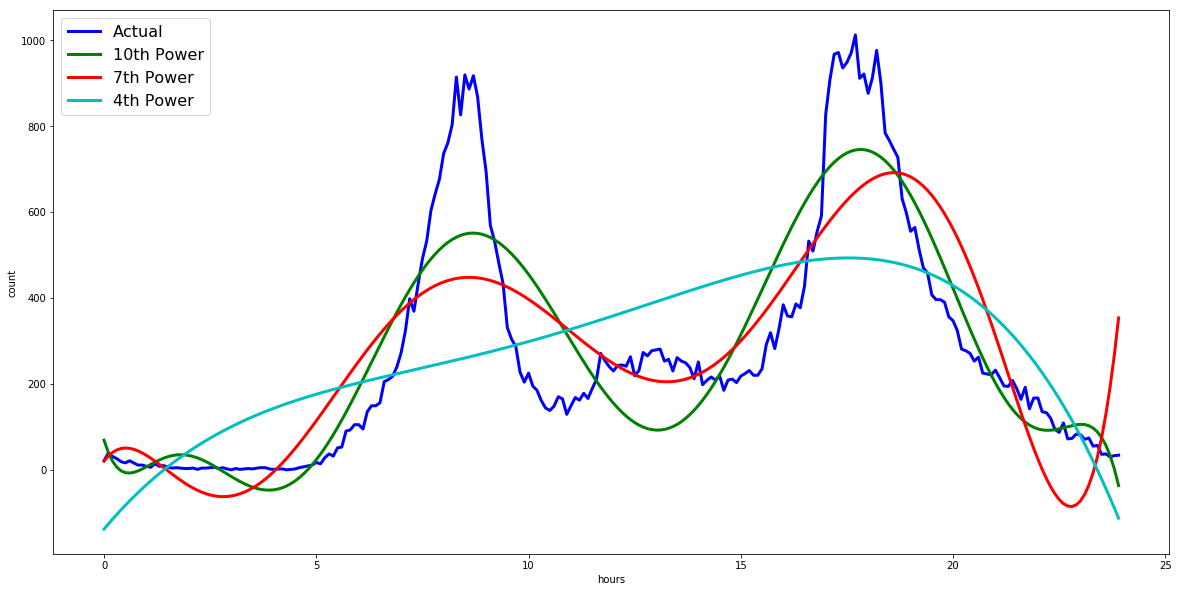

In [37]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

monx = monday.index.values.reshape(-1,1)
mony = np.nan_to_num(monday.values)

#poly = 4
poly4 = PolynomialFeatures(degree=4)
monday4 = poly4.fit_transform(monx)
linear4 = linear_model.LinearRegression()
linear4.fit(monday4, mony)


#poly = 7
poly7 = PolynomialFeatures(degree=7)
monday7 = poly7.fit_transform(monx)
linear7 = linear_model.LinearRegression()
linear7.fit(monday7, mony)

#poly = 10
poly10 = PolynomialFeatures(degree=10)
monday10 = poly10.fit_transform(monx)
linear10 = linear_model.LinearRegression()
linear10.fit(monday10, mony)


#plot results
import numpy as np
from matplotlib.pyplot import figure
#increase plot size
plt.plot(monx, mony, c = 'b', label = 'Actual', linewidth = 3)
plt.xlabel('hours')
plt.ylabel('count')
plt.plot(monx, np.dot(monday10, linear10.coef_) + linear10.intercept_, c='g', label = '10th Power', linewidth = 3)
plt.plot(monx, np.dot(monday7, linear7.coef_) + linear7.intercept_, c='r', label = '7th Power', linewidth = 3)
plt.plot(monx, np.dot(monday4, linear4.coef_) + linear4.intercept_, c='c', label = '4th Power', linewidth = 3)
plt.legend(loc = 'upper left', prop={'size': 16})

## 2b. Repeat `2a` for `saturday`

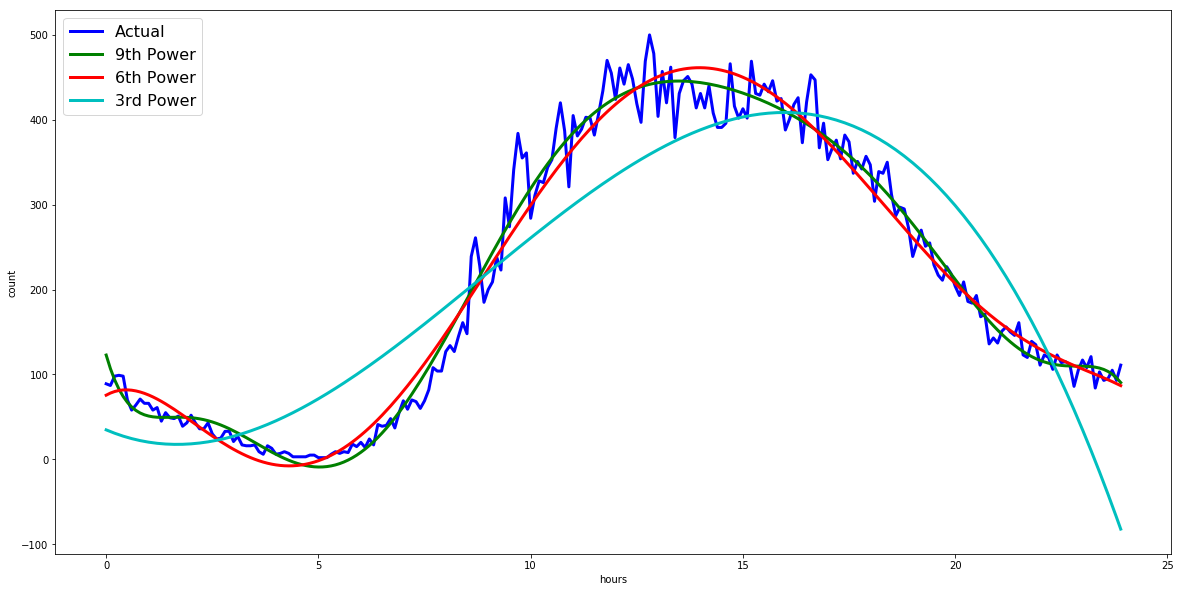

In [38]:
satx = saturday.index.values.reshape(-1,1)
saty = np.nan_to_num(saturday.values)

#poly = 2 for second bump
poly3 = PolynomialFeatures(degree=3)
saturday3 = poly3.fit_transform(satx)
linear3 = linear_model.LinearRegression()
linear3.fit(saturday3, saty)

#poly = 6 for first bump
poly6 = PolynomialFeatures(degree = 6)
saturday6 = poly6.fit_transform(satx)
linear6 = linear_model.LinearRegression()
linear6.fit(saturday6, saty)

#poly = 9 for third bump
poly9 = PolynomialFeatures(degree=9)
saturday9 = poly9.fit_transform(satx)
linear9 = linear_model.LinearRegression()
linear9.fit(saturday9, saty)

#plot results
plt.plot(satx, saty, c = 'b', label = 'Actual', linewidth = 3)
plt.xlabel('hours')
plt.ylabel('count')
plt.plot(satx, np.dot(saturday9, linear9.coef_) + linear9.intercept_, c='g', label = '9th Power', linewidth = 3)
plt.plot(satx, np.dot(saturday6, linear6.coef_) + linear6.intercept_, c='r', label = '6th Power', linewidth = 3)
plt.plot(satx, np.dot(saturday3, linear3.coef_) + linear3.intercept_, c='c', label = '3rd Power', linewidth = 3)
plt.legend(loc = 'upper left', prop={'size': 16})

Looking at the two graphs above, the polynomials with the higher powers both appear to be the best fit; the 10th degree and 9th degree for monday and saturday respectively.

## 3. (for both `monday` and `saturday`) Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


/Users/Broth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.63192e-29): result may not be accurate.
  overwrite_a=True).T
/Users/Broth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.89575e-29): result may not be accurate.
  overwrite_a=True).T
/Users/Broth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.31596e-28): result may not be accurate.
  overwrite_a=True).T


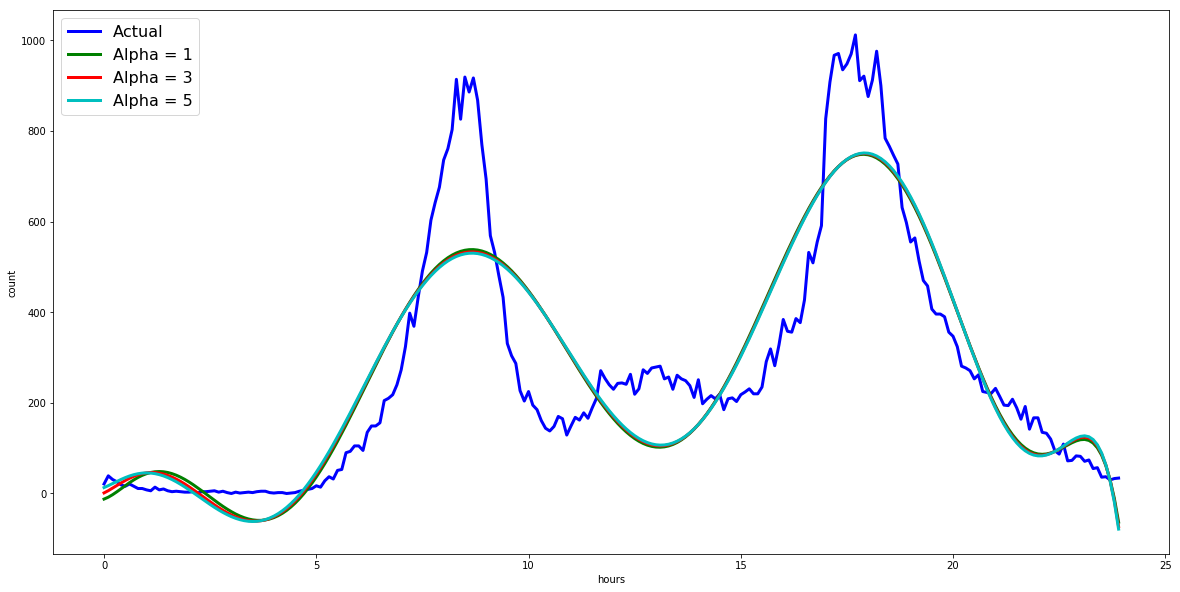

In [39]:
#Monday
ridge1 = linear_model.Ridge(alpha = 1)
ridge3 = linear_model.Ridge(alpha = 3)
ridge5 = linear_model.Ridge(alpha = 5)

ridge1.fit(monday10, mony)
ridge3.fit(monday10, mony)
ridge5.fit(monday10, mony)

plt.plot(monx, mony, c = 'b', label = 'Actual', linewidth = 3)
plt.xlabel('hours')
plt.ylabel('count')
plt.plot(monx, np.dot(monday10, ridge1.coef_) + ridge1.intercept_, c='g', label = 'Alpha = 1', linewidth = 3)
plt.plot(monx, np.dot(monday10, ridge3.coef_) + ridge3.intercept_, c='r', label = 'Alpha = 3', linewidth = 3)
plt.plot(monx, np.dot(monday10, ridge5.coef_) + ridge5.intercept_, c='c', label = 'Alpha = 5', linewidth = 3)
plt.legend(loc = 'upper left', prop={'size': 16})

/Users/Broth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.67322e-26): result may not be accurate.
  overwrite_a=True).T
/Users/Broth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.35975e-26): result may not be accurate.
  overwrite_a=True).T
/Users/Broth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.39329e-25): result may not be accurate.
  overwrite_a=True).T


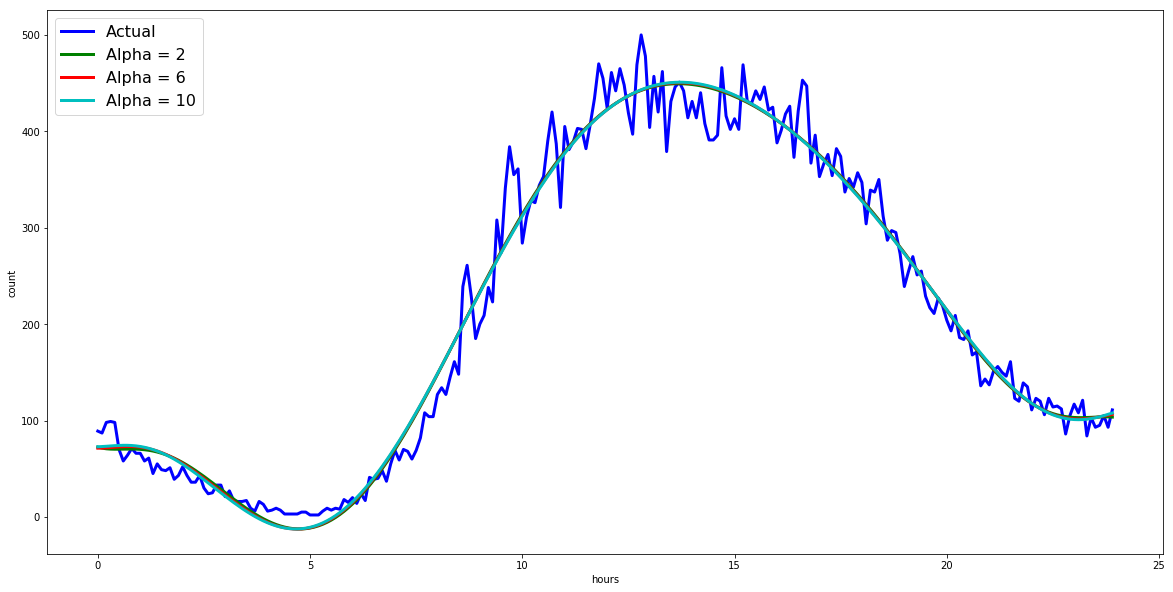

In [40]:
#Saturday
ridge2 = linear_model.Ridge(alpha = 2)
ridge6 = linear_model.Ridge(alpha = 6)
ridge10 = linear_model.Ridge(alpha = 10)

ridge2.fit(saturday9, saty)
ridge6.fit(saturday9, saty)
ridge10.fit(saturday9, saty)

plt.plot(satx, saty, c = 'b', label = 'Actual', linewidth = 3)
plt.xlabel('hours')
plt.ylabel('count')
plt.plot(monx, np.dot(saturday9, ridge2.coef_) + ridge2.intercept_, c='g', label = 'Alpha = 2', linewidth = 3)
plt.plot(monx, np.dot(saturday9, ridge6.coef_) + ridge6.intercept_, c='r', label = 'Alpha = 6', linewidth = 3)
plt.plot(monx, np.dot(saturday9, ridge10.coef_) + ridge10.intercept_, c='c', label = 'Alpha = 10', linewidth = 3)
plt.legend(loc = 'upper left', prop={'size': 16})

### Looking at the above two graphs, changing the value of alpha does not appear improve the fit of the models. The Saturday model appears to be pretty closely fit. Monday's mondel, however, is not as successful. My best guess to improve the model fit would to be a polynomial model without every power filled (e.g. x^5 + x^3  + x^2 + x + c), but that seems like it would involve a lot of trial and error. Additionally, morning and evenings appear to behave similarly, so I would also suggest creating separate models for pre/post workday times, and during workday times